<a href="https://colab.research.google.com/github/RobertoRamosCastro/Neural-network/blob/main/Clasficacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [105]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [106]:
datos_training, datos_testing = datos['train'], datos['test']

In [107]:
classes_names = metadatos.features['label'].names 
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [108]:
# Normalizar datos para mejorar y acelerar el entrenamiento
def norm(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

# Normalizar todos los datos de entrenamiento y pruebas con la funcion de arriba
datos_training = datos_training.map(norm)
datos_testing = datos_testing.map(norm)

# Agregar los datos en cache
datos_training = datos_training.cache()
datos_testing = datos_testing.cache() 

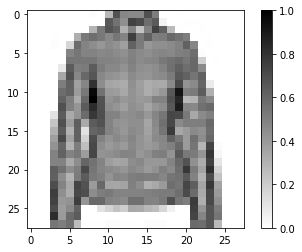

In [109]:
# Mostar una imagen de los datos de prueba, de momento mostramos la priemra solo
import matplotlib.pyplot as plt

for imagen, lbl, in datos_testing.take(1):
  break
  imagen = imagen.numpy().reshape((28,28)) # Redimensionamos

# Dibujar la imagen
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

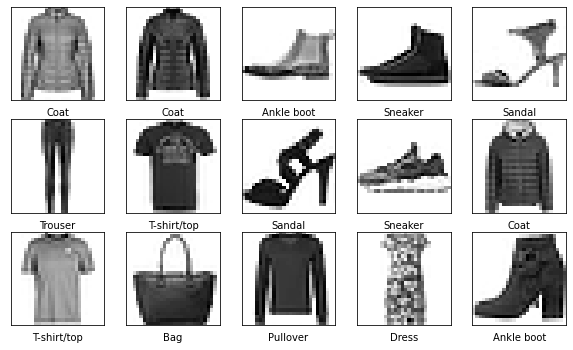

In [110]:
# Imprimir varias y la etiqueta correspondiente
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_testing.take(15)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(classes_names[etiqueta])
plt.show

In [120]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Softmax
from keras.activations import relu


num_classes = len(classes_names)

modelo = Sequential([
  
  Flatten(),
  Dense(50, activation=relu),
  Dense(50, activation=relu),
  Dense(50, activation=relu),
  Dense(num_classes, activation='softmax')

])

'''# Hidden Layer 1
  Conv2D(16, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  # Hidden Layer 2
  Conv2D(32, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  # Hidden Layer 3
  Conv2D(64, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),'''



"# Hidden Layer 1\n  Conv2D(16, (3,3), padding='same', activation='relu'),\n  MaxPooling2D(pool_size=(2,2)),\n  # Hidden Layer 2\n  Conv2D(32, (3,3), padding='same', activation='relu'),\n  MaxPooling2D(pool_size=(2,2)),\n  # Hidden Layer 3\n  Conv2D(64, (3,3), padding='same', activation='relu'),\n  MaxPooling2D(pool_size=(2,2)),"

In [121]:
modelo.summary()

ValueError: ignored

In [122]:
from keras.losses import sparse_categorical_crossentropy

modelo.compile(optimizer='Adam',
               loss=sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [123]:

'''# tamaño de batch, parametros
batch_size = 32

datos_training = datos_training.repeat().shuffle(60000).batch(batch_size)
datos_training = datos_training.batch(batch_size)'''

'# tamaño de batch, parametros\nbatch_size = 32\n\ndatos_training = datos_training.repeat().shuffle(60000).batch(batch_size)\ndatos_training = datos_training.batch(batch_size)'

In [124]:
epocas = 20
batch_size = 32
iterations=60000/batch_size

history = modelo.fit(datos_training,
                     batch_size=batch_size,
                     epochs=epocas,
                     steps_per_epoch=iterations)

Epoch 1/20


ValueError: ignored